# Project F&B

#### Import Module

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
import squarify
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D

#### Import data

In [2]:
cities_df = pd.read_csv('./dim_cities.csv')

In [3]:
cities_df

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [4]:
respondents_df = pd.read_csv('./dim_repondents.csv')

In [5]:
respondents_df.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [6]:
survey_response_df = pd.read_csv('./fact_survey_responses.csv')

In [7]:
survey_response_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


#### Preprocessing

In [8]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [9]:
respondents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [10]:
survey_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [11]:
respondents_category_list = ['Age', 'Gender']
survey_response_category_list = ['Consume_frequency', 'Typical_consumption_situations']
for col in respondents_category_list:
    respondents_df[col] = respondents_df[col].astype('category')

for col in survey_response_category_list:
    survey_response_df[col] = survey_response_df[col].astype('category')

In [12]:
respondents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Respondent_ID  10000 non-null  int64   
 1   Name           10000 non-null  object  
 2   Age            10000 non-null  category
 3   Gender         10000 non-null  category
 4   City_ID        10000 non-null  object  
dtypes: category(2), int64(1), object(2)
memory usage: 254.4+ KB


In [13]:
survey_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Response_ID                     10000 non-null  int64   
 1   Respondent_ID                   10000 non-null  int64   
 2   Consume_frequency               10000 non-null  category
 3   Consume_time                    10000 non-null  object  
 4   Consume_reason                  10000 non-null  object  
 5   Heard_before                    10000 non-null  object  
 6   Brand_perception                10000 non-null  object  
 7   General_perception              10000 non-null  object  
 8   Tried_before                    10000 non-null  object  
 9   Taste_experience                10000 non-null  int64   
 10  Reasons_preventing_trying       10000 non-null  object  
 11  Current_brands                  10000 non-null  object  
 12  Reasons_for_choosin

## Demographic Insights

#### 1. Who prefers energy drink more? (male/female/non-binary?)

In [14]:
respondents_df.groupby('Gender')
print(respondents_df.groupby('Gender').count)

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000228299C0790>>


In [15]:
respondents_gender_count = respondents_df.groupby('Gender').count().reset_index()
respondents_gender_count

,Gender,Respondent_ID,Name,Age,City_ID
0,Female,3455,3455,3455,3455
1,Male,6038,6038,6038,6038
2,Non-binary,507,507,507,507


In [16]:
respondents_unique = respondents_df.Name.unique()
len(respondents_unique)

9487

In [17]:
plt.style.available
plt.style.use('seaborn-v0_8-white')

Text(0, 0.5, 'Respondents')

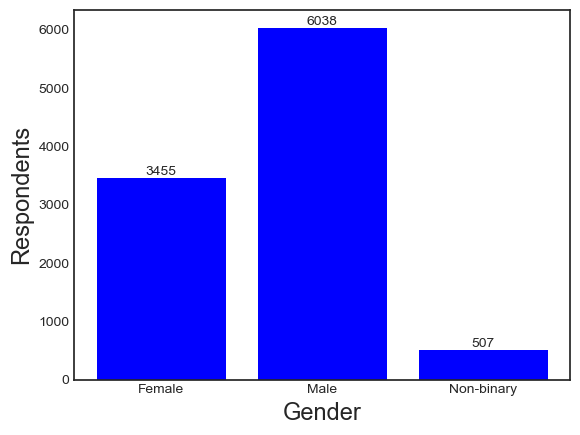

In [18]:
fig,ax = plt.subplots()
bars = ax.bar(data=respondents_gender_count, x='Gender', height='Respondent_ID', color='blue')
ax.bar_label(bars)
# Use this code to display values on top of bar chart
plt.xlabel('Gender',fontsize=17)
plt.ylabel('Respondents', fontsize=17)

#### 2. Which age group prefers energy drinks more?

In [19]:
age_group = respondents_df.groupby('Age').count().reset_index()
age_group.head()

,Age,Respondent_ID,Name,Gender,City_ID
0,15-18,1488,1488,1488,1488
1,19-30,5520,5520,5520,5520
2,31-45,2376,2376,2376,2376
3,46-65,426,426,426,426
4,65+,190,190,190,190


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

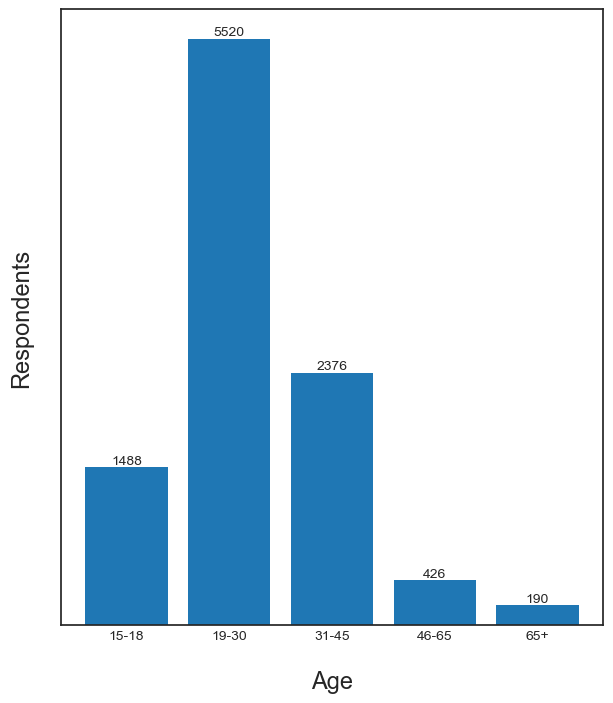

In [20]:
fig,ax = plt.subplots(figsize=(7,8))
age_bars = ax.bar(data=age_group, x='Age', height='Respondent_ID')
plt.bar_label(age_bars)
ax.set_xlabel('Age', fontsize=17,labelpad=20)
# plt.xlabel('Age', fontsize=17)
ax.set_ylabel('Respondents', fontsize=17,labelpad=20)
# plt.ylabel('Respondents', fontsize=17)
plt.yticks(visible=False)

#### 3. Which type of marketing reaches the most Youth (15-30)

In [21]:
respondent_id_by_youth = respondents_df[(respondents_df['Age']=='15-18') | (respondents_df['Age']=='19-30')]
respondent_id_by_youth.value_counts()

Respondent_ID  Name              Age    Gender  City_ID
120031         Aniruddh Issac    15-18  Female  CT117      1
126725         Pari Kulkarni     19-30  Male    CT113      1
126743         Sana Kala         15-18  Male    CT112      1
126741         Hridaan Banerjee  15-18  Female  CT116      1
126740         Vaibhav Kaur      19-30  Female  CT111      1
                                                          ..
123338         Lakshay Samra     15-18  Female  CT111      1
123337         Gatik Gala        19-30  Male    CT112      1
123336         Yashvi Kaur       19-30  Male    CT116      1
123335         Taimur Jha        19-30  Male    CT113      1
130030         Piya Varty        15-18  Male    CT112      1
Length: 7008, dtype: int64

In [22]:
a=[]
for i in respondent_id_by_youth['Age']:
    a=a+[i]

In [23]:
b=[]
for k in respondent_id_by_youth['Respondent_ID']:
    b=b+[k]

In [24]:
marketing_channels_reach_youth_df=pd.DataFrame({'Age':a})

In [25]:
marketing_channels_reach_youth_df['Respondent_ID'] = pd.DataFrame({'Respondent_ID':b})

In [26]:
marketing_channels_reach_youth_df

,Age,Respondent_ID
0,15-18,120031
1,19-30,120032
2,15-18,120033
3,19-30,120035
4,19-30,120036
...,...,...
7003,19-30,130024
7004,19-30,130025
7005,15-18,130027
7006,19-30,130029


In [27]:
marketing_channels_by_youth = []
for respondents_youth in marketing_channels_reach_youth_df['Respondent_ID']:
    marketing_channels_by_youth_df = survey_response_df[survey_response_df['Respondent_ID']==respondents_youth]
    for values in marketing_channels_by_youth_df['Marketing_channels']:
        marketing_channels_by_youth = marketing_channels_by_youth + [values]
print(len(marketing_channels_by_youth))

7008


In [28]:
marketing_channels_reach_youth_df['Marketing_channels'] = pd.DataFrame({'Marketing_channels':marketing_channels_by_youth})

In [29]:
marketing_channels_reach_youth_df

,Age,Respondent_ID,Marketing_channels
0,15-18,120031,TV commercials
1,19-30,120032,Print media
2,15-18,120033,Online ads
3,19-30,120035,Online ads
4,19-30,120036,TV commercials
...,...,...,...
7003,19-30,130024,Online ads
7004,19-30,130025,Print media
7005,15-18,130027,TV commercials
7006,19-30,130029,Online ads


In [30]:
marketing_channels_youth_group = marketing_channels_reach_youth_df.groupby('Marketing_channels')
marketing_channels_youth_group = marketing_channels_youth_group.count().reset_index()
marketing_channels_youth_group

,Marketing_channels,Age,Respondent_ID
0,Online ads,3373,3373
1,Other,702,702
2,Outdoor billboards,702,702
3,Print media,446,446
4,TV commercials,1785,1785


In [31]:
marketing_channels_by_youth_percentage=[]
for percent in marketing_channels_youth_group['Age']:
    percent = round((percent*100)/(marketing_channels_youth_group['Age'].sum()),2)
    marketing_channels_by_youth_percentage = marketing_channels_by_youth_percentage + [str(percent)]
    
marketing_channels_youth_group['Percentage'] = pd.DataFrame({'Percentage':marketing_channels_by_youth_percentage})

In [32]:
marketing_channels_youth_group

,Marketing_channels,Age,Respondent_ID,Percentage
0,Online ads,3373,3373,48.13
1,Other,702,702,10.02
2,Outdoor billboards,702,702,10.02
3,Print media,446,446,6.36
4,TV commercials,1785,1785,25.47


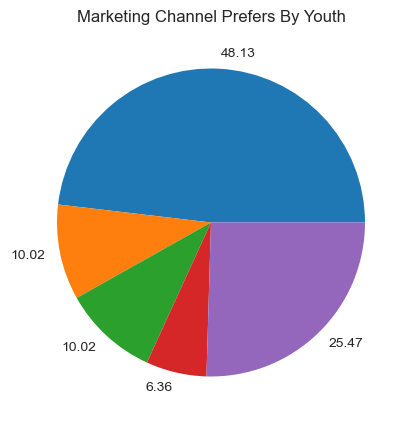

In [33]:
fig, ax= plt.subplots(figsize=(5,5))
pie = ax.pie(data=marketing_channels_youth_group,x='Percentage', labels='Percentage')

ax.set(title='Marketing Channel Prefers By Youth');

## Consumer Preferences


#### 1. What are the preferred ingredients of energy drinks among respondents?

In [34]:
survey_response_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [35]:
respondent_id_values = []
for respondents in survey_response_df['Respondent_ID']:
    respondent_id_values = respondent_id_values + [respondents]
print(len(respondent_id_values))

10000


In [36]:
ingredients_expected_values = []
for ingredients in survey_response_df['Ingredients_expected']:
    ingredients_expected_values = ingredients_expected_values + [ingredients]
print(ingredients_expected_values)

['Guarana', 'Caffeine', 'Caffeine', 'Caffeine', 'Caffeine', 'Vitamins', 'Guarana', 'Sugar', 'Sugar', 'Caffeine', 'Guarana', 'Caffeine', 'Caffeine', 'Vitamins', 'Sugar', 'Caffeine', 'Sugar', 'Guarana', 'Caffeine', 'Caffeine', 'Caffeine', 'Vitamins', 'Caffeine', 'Sugar', 'Sugar', 'Caffeine', 'Sugar', 'Caffeine', 'Caffeine', 'Vitamins', 'Caffeine', 'Vitamins', 'Guarana', 'Caffeine', 'Vitamins', 'Caffeine', 'Caffeine', 'Sugar', 'Vitamins', 'Caffeine', 'Sugar', 'Caffeine', 'Vitamins', 'Sugar', 'Vitamins', 'Caffeine', 'Vitamins', 'Guarana', 'Vitamins', 'Vitamins', 'Guarana', 'Caffeine', 'Caffeine', 'Sugar', 'Guarana', 'Sugar', 'Vitamins', 'Caffeine', 'Sugar', 'Vitamins', 'Vitamins', 'Vitamins', 'Vitamins', 'Caffeine', 'Vitamins', 'Caffeine', 'Caffeine', 'Sugar', 'Vitamins', 'Caffeine', 'Sugar', 'Vitamins', 'Vitamins', 'Caffeine', 'Vitamins', 'Caffeine', 'Sugar', 'Caffeine', 'Vitamins', 'Vitamins', 'Caffeine', 'Caffeine', 'Sugar', 'Vitamins', 'Guarana', 'Caffeine', 'Vitamins', 'Guarana', 'Vit

In [37]:
respondent_id_by_ingredients_df = pd.DataFrame({'Respondent_ID':respondent_id_values,'Ingredients_expected':ingredients_expected_values})

In [38]:
respondent_id_by_ingredients_df

,Respondent_ID,Ingredients_expected
0,120031,Guarana
1,120032,Caffeine
2,120033,Caffeine
3,120034,Caffeine
4,120035,Caffeine
...,...,...
9995,130026,Caffeine
9996,130027,Caffeine
9997,130028,Caffeine
9998,130029,Sugar


In [39]:
respondent_id_by_ingredients_df = respondent_id_by_ingredients_df.groupby('Ingredients_expected').count()

In [40]:
respondent_count_by_ingredients = []
for x in respondent_id_by_ingredients_df['Respondent_ID']:
    respondent_count_by_ingredients = respondent_count_by_ingredients + [x]

In [41]:
respondent_id_by_ingredients_df = respondent_id_by_ingredients_df.reset_index()

In [42]:
respondent_id_by_ingredients_df

,Ingredients_expected,Respondent_ID
0,Caffeine,3896
1,Guarana,1553
2,Sugar,2017
3,Vitamins,2534


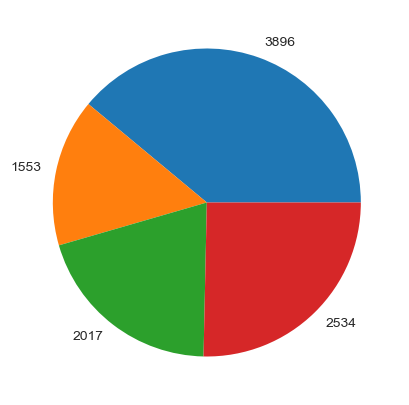

In [43]:
fig,ax = plt.subplots(figsize=(5,5))
ingridients_expected_pie = ax.pie(data=respondent_id_by_ingredients_df, x='Respondent_ID', labels='Respondent_ID', )

#### 2. What packaging preferences do respondents have for energy drinks?

In [44]:
survey_response_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [45]:
packaging_preference_values = []
for packaging_values in survey_response_df['Packaging_preference']:
    packaging_preference_values = packaging_preference_values + [packaging_values]
print(len(packaging_preference_values))    

10000


In [46]:
respondents_id_by_packaging_preference_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Packaging_preference':packaging_preference_values})

In [47]:
respondents_id_by_packaging_preference_df

,Respondent_ID,Packaging_preference
0,120031,Compact and portable cans
1,120032,Compact and portable cans
2,120033,Innovative bottle design
3,120034,Compact and portable cans
4,120035,Compact and portable cans
...,...,...
9995,130026,Compact and portable cans
9996,130027,Other
9997,130028,Compact and portable cans
9998,130029,Compact and portable cans


In [48]:
respondents_id_by_packaging_preference_df=respondents_id_by_packaging_preference_df.groupby('Packaging_preference')
respondents_id_by_packaging_preference_df=respondents_id_by_packaging_preference_df.count().reset_index()

In [49]:
respondents_id_by_packaging_preference_df

,Packaging_preference,Respondent_ID
0,Collectible packaging,1501
1,Compact and portable cans,3984
2,Eco-friendly design,983
3,Innovative bottle design,3047
4,Other,485


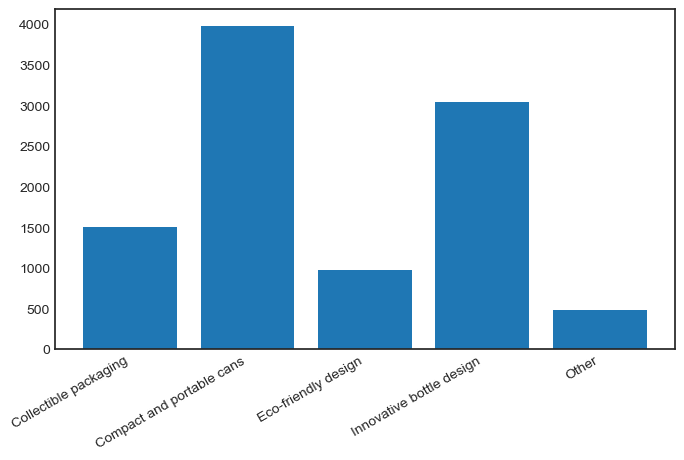

In [50]:
fig,ax = plt.subplots(figsize=(8,5))
respondents_packaging_bar = ax.bar(data=respondents_id_by_packaging_preference_df, x= 'Packaging_preference', height='Respondent_ID')
fig.autofmt_xdate()

## Competition Analysis

#### 1. Who are the current market leaders?

In [51]:
current_brands_values = []
for brands in survey_response_df['Current_brands']:
    current_brands_values = current_brands_values + [brands]

In [52]:
respondent_id_values

[120031,
 120032,
 120033,
 120034,
 120035,
 120036,
 120037,
 120038,
 120039,
 120040,
 120041,
 120042,
 120043,
 120044,
 120045,
 120046,
 120047,
 120048,
 120049,
 120050,
 120051,
 120052,
 120053,
 120054,
 120055,
 120056,
 120057,
 120058,
 120059,
 120060,
 120061,
 120062,
 120063,
 120064,
 120065,
 120066,
 120067,
 120068,
 120069,
 120070,
 120071,
 120072,
 120073,
 120074,
 120075,
 120076,
 120077,
 120078,
 120079,
 120080,
 120081,
 120082,
 120083,
 120084,
 120085,
 120086,
 120087,
 120088,
 120089,
 120090,
 120091,
 120092,
 120093,
 120094,
 120095,
 120096,
 120097,
 120098,
 120099,
 120100,
 120101,
 120102,
 120103,
 120104,
 120105,
 120106,
 120107,
 120108,
 120109,
 120110,
 120111,
 120112,
 120113,
 120114,
 120115,
 120116,
 120117,
 120118,
 120119,
 120120,
 120121,
 120122,
 120123,
 120124,
 120125,
 120126,
 120127,
 120128,
 120129,
 120130,
 120131,
 120132,
 120133,
 120134,
 120135,
 120136,
 120137,
 120138,
 120139,
 120140,
 120141,
 

In [53]:
respondent_count_by_current_brand_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Current_brands':current_brands_values})

In [54]:
respondent_count_by_current_brand_df

,Respondent_ID,Current_brands
0,120031,Blue Bull
1,120032,Bepsi
2,120033,Bepsi
3,120034,Bepsi
4,120035,Sky 9
...,...,...
9995,130026,Cola-Coka
9996,130027,Gangster
9997,130028,Blue Bull
9998,130029,Blue Bull


In [55]:
respondent_count_by_current_brand_df = respondent_count_by_current_brand_df.groupby('Current_brands').count()

In [56]:
respondent_count_by_current_brand_df = respondent_count_by_current_brand_df.reset_index()

In [57]:
respondent_count_by_current_brand_df

,Current_brands,Respondent_ID
0,Bepsi,2112
1,Blue Bull,1058
2,CodeX,980
3,Cola-Coka,2538
4,Gangster,1854
5,Others,479
6,Sky 9,979


In [58]:
current_brands_percentage = []
for brands_percentage in respondent_count_by_current_brand_df['Respondent_ID']:
    percentage = brands_percentage*100/10000
    current_brands_percentage = current_brands_percentage + [percentage]

In [59]:
respondent_count_by_current_brand_df['Percentage'] = pd.DataFrame({'Percentage':current_brands_percentage})

In [60]:
respondent_count_by_current_brand_df

,Current_brands,Respondent_ID,Percentage
0,Bepsi,2112,21.12
1,Blue Bull,1058,10.58
2,CodeX,980,9.80
3,Cola-Coka,2538,25.38
4,Gangster,1854,18.54
5,Others,479,4.79
6,Sky 9,979,9.79


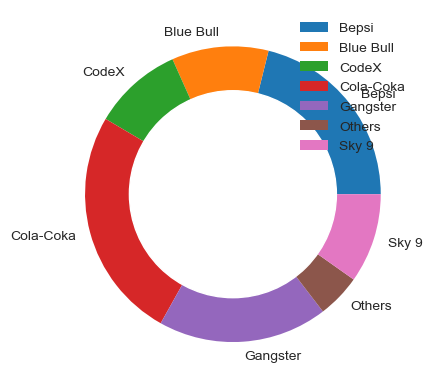

In [61]:
current_brands_circle = plt.Circle((0,0), 0.7, color='white')
plt.pie(data=respondent_count_by_current_brand_df, x='Percentage', labels='Current_brands')
current_brands_pie = plt.gcf()
current_brands_pie.gca().add_artist(current_brands_circle)
plt.legend()

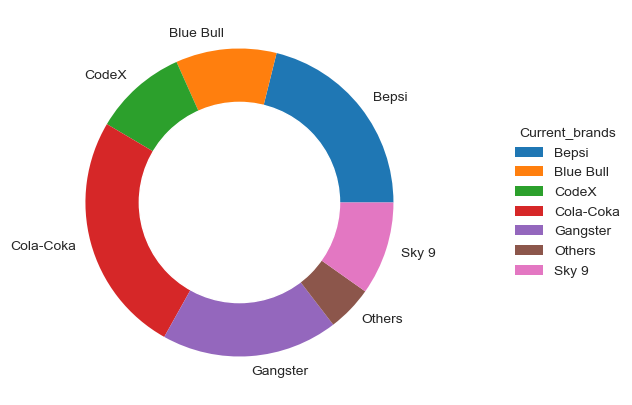

In [62]:
fig,ax=plt.subplots(figsize=(8,5))
current_brands_circle = plt.Circle((0,0), 0.65, color='white')
ax.pie(data=respondent_count_by_current_brand_df, x='Percentage', labels='Current_brands')
current_brands = plt.gcf()
current_brands.gca().add_artist(current_brands_circle)
fig.legend(title='Current_brands',loc='center right');


#### 2. What are the primary reasons consumers prefer those brands over ours?

In [63]:
survey_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Response_ID                     10000 non-null  int64   
 1   Respondent_ID                   10000 non-null  int64   
 2   Consume_frequency               10000 non-null  category
 3   Consume_time                    10000 non-null  object  
 4   Consume_reason                  10000 non-null  object  
 5   Heard_before                    10000 non-null  object  
 6   Brand_perception                10000 non-null  object  
 7   General_perception              10000 non-null  object  
 8   Tried_before                    10000 non-null  object  
 9   Taste_experience                10000 non-null  int64   
 10  Reasons_preventing_trying       10000 non-null  object  
 11  Current_brands                  10000 non-null  object  
 12  Reasons_for_choosin

In [64]:
reasons_for_choosing_brands_values = []
for choosing_brands in survey_response_df['Reasons_for_choosing_brands']:
    reasons_for_choosing_brands_values = reasons_for_choosing_brands_values + [choosing_brands]

In [65]:
respondent_count_by_reason_choosing_brands_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Reasons_for_choosing_brands':reasons_for_choosing_brands_values})

In [66]:
respondent_count_by_reason_choosing_brands_df

,Respondent_ID,Reasons_for_choosing_brands
0,120031,Availability
1,120032,Availability
2,120033,Availability
3,120034,Other
4,120035,Other
...,...,...
9995,130026,Brand reputation
9996,130027,Effectiveness
9997,130028,Availability
9998,130029,Taste/flavor preference


In [67]:
respondent_count_by_reason_choosing_brands_df=respondent_count_by_reason_choosing_brands_df.groupby('Reasons_for_choosing_brands').count()

In [68]:
respondent_count_by_reason_choosing_brands_df = respondent_count_by_reason_choosing_brands_df.reset_index()

In [69]:
respondent_count_by_reason_choosing_brands_df

,Reasons_for_choosing_brands,Respondent_ID
0,Availability,1910
1,Brand reputation,2652
2,Effectiveness,1748
3,Other,1679
4,Taste/flavor preference,2011


Text(0.5, 0, 'Reason for Choosing Other Brands')

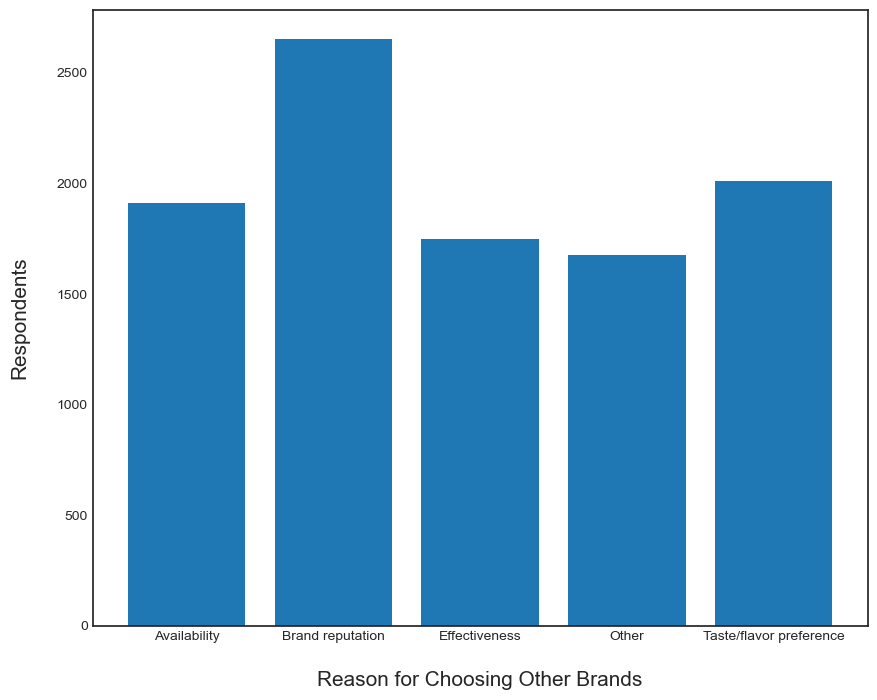

In [70]:
fig,ax = plt.subplots(figsize=(10,8))
bars = ax.bar(data=respondent_count_by_reason_choosing_brands_df, x='Reasons_for_choosing_brands', height='Respondent_ID')
ax.set_ylabel('Respondents', labelpad=20, fontsize=15)
ax.set_xlabel('Reason for Choosing Other Brands', labelpad=20, fontsize=15)

## Marketing Channels and Brand Awareness


#### 1. Which marketing channels can be used to reach more customers?

In [71]:
marketing_channels_values = []
for channels in survey_response_df['Marketing_channels']:
    marketing_channels_values = marketing_channels_values + [channels]

In [72]:
respondents_count_by_marketing_channels_brands_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Marketing_channels':marketing_channels_values, 'Current_brands':current_brands_values})

In [73]:
respondents_count_by_marketing_channels_brands_df

,Respondent_ID,Marketing_channels,Current_brands
0,120031,TV commercials,Blue Bull
1,120032,Print media,Bepsi
2,120033,Online ads,Bepsi
3,120034,Online ads,Bepsi
4,120035,Online ads,Sky 9
...,...,...,...
9995,130026,Print media,Cola-Coka
9996,130027,TV commercials,Gangster
9997,130028,Outdoor billboards,Blue Bull
9998,130029,Online ads,Blue Bull


In [74]:
for change_brands in respondents_count_by_marketing_channels_brands_df['Current_brands']:
    if change_brands != 'CodeX':
        respondents_count_by_marketing_channels_brands_df['Current_brands'] = respondents_count_by_marketing_channels_brands_df['Current_brands'].replace([change_brands],'Other')

In [75]:
test_1 = respondents_count_by_marketing_channels_brands_df
test_1

,Respondent_ID,Marketing_channels,Current_brands
0,120031,TV commercials,Other
1,120032,Print media,Other
2,120033,Online ads,Other
3,120034,Online ads,Other
4,120035,Online ads,Other
...,...,...,...
9995,130026,Print media,Other
9996,130027,TV commercials,Other
9997,130028,Outdoor billboards,Other
9998,130029,Online ads,Other


In [76]:
respondents_count_by_marketing_channels_brands_df

,Respondent_ID,Marketing_channels,Current_brands
0,120031,TV commercials,Other
1,120032,Print media,Other
2,120033,Online ads,Other
3,120034,Online ads,Other
4,120035,Online ads,Other
...,...,...,...
9995,130026,Print media,Other
9996,130027,TV commercials,Other
9997,130028,Outdoor billboards,Other
9998,130029,Online ads,Other


In [77]:
for i in test_1['Respondent_ID']:
    test_1.loc[(test_1['Marketing_channels']=='TV commercials') & (test_1['Current_brands']=='Other'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='TV commercials') & (test_1['Current_brands']=='Other')]['Respondent_ID'].replace(i,2427)
    test_1.loc[(test_1['Marketing_channels']=='Print media') & (test_1['Current_brands']=='Other'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Print media') & (test_1['Current_brands']=='Other')]['Respondent_ID'].replace(i,768)
    test_1.loc[(test_1['Marketing_channels']=='Outdoor billboards') & (test_1['Current_brands']=='Other'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Outdoor billboards') & (test_1['Current_brands']=='Other')]['Respondent_ID'].replace(i,1107)
    test_1.loc[(test_1['Marketing_channels']=='Online ads') & (test_1['Current_brands']=='Other'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Online ads') & (test_1['Current_brands']=='Other')]['Respondent_ID'].replace(i,3609)
    test_1.loc[(test_1['Marketing_channels']=='Other') & (test_1['Current_brands']=='Other'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Other') & (test_1['Current_brands']=='Other')]['Respondent_ID'].replace(i,1109)    

In [78]:
for i in test_1['Respondent_ID']:
    test_1.loc[(test_1['Marketing_channels']=='TV commercials') & (test_1['Current_brands']=='CodeX'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='TV commercials') & (test_1['Current_brands']=='CodeX')]['Respondent_ID'].replace(i,261)
    test_1.loc[(test_1['Marketing_channels']=='Print media') & (test_1['Current_brands']=='CodeX'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Print media') & (test_1['Current_brands']=='CodeX')]['Respondent_ID'].replace(i,73)
    test_1.loc[(test_1['Marketing_channels']=='Outdoor billboards') & (test_1['Current_brands']=='CodeX'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Outdoor billboards') & (test_1['Current_brands']=='CodeX')]['Respondent_ID'].replace(i,119)
    test_1.loc[(test_1['Marketing_channels']=='Online ads') & (test_1['Current_brands']=='CodeX'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Online ads') & (test_1['Current_brands']=='CodeX')]['Respondent_ID'].replace(i,411)
    test_1.loc[(test_1['Marketing_channels']=='Other') & (test_1['Current_brands']=='CodeX'), 'Respondent_ID']=test_1[(test_1['Marketing_channels']=='Other') & (test_1['Current_brands']=='CodeX')]['Respondent_ID'].replace(i,116)    

In [79]:
respondents_count_by_marketing_channels_brands_df = test_1

In [80]:
respondents_count_by_marketing_channels_brands_df

,Respondent_ID,Marketing_channels,Current_brands
0,2427,TV commercials,Other
1,768,Print media,Other
2,3609,Online ads,Other
3,3609,Online ads,Other
4,3609,Online ads,Other
...,...,...,...
9995,768,Print media,Other
9996,2427,TV commercials,Other
9997,1107,Outdoor billboards,Other
9998,3609,Online ads,Other


[Text(0.5, 0, 'Respondents'), Text(0, 0.5, 'Marketing Channels')]

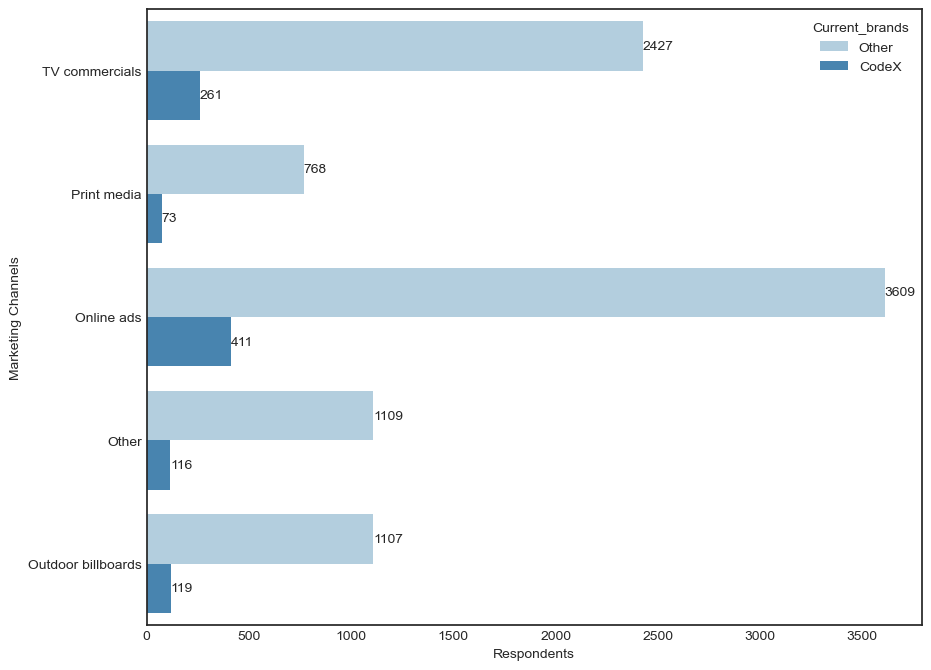

In [81]:
# Gắn giá trị cho bar_label
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(data=respondents_count_by_marketing_channels_brands_df, x='Respondent_ID', y='Marketing_channels', hue='Current_brands',palette='Blues')
for x in ax.containers:
#     containers: list giá trị của bar_label
    ax.bar_label(x)
ax.set(xlabel='Respondents', ylabel='Marketing Channels')

#### 2. How effective are different marketing strategies and channels in reaching our customers?

In [82]:
survey_response_df

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


In [83]:
respondent_count_by_marketing_channels = pd.DataFrame({'Respondent_ID':respondent_id_values,'Marketing_channels':marketing_channels_values})

In [84]:
respondent_count_by_marketing_channels

,Respondent_ID,Marketing_channels
0,120031,TV commercials
1,120032,Print media
2,120033,Online ads
3,120034,Online ads
4,120035,Online ads
...,...,...
9995,130026,Print media
9996,130027,TV commercials
9997,130028,Outdoor billboards
9998,130029,Online ads


In [85]:
respondent_count_by_marketing_channels = pd.pivot_table(data=respondent_count_by_marketing_channels,index='Marketing_channels',values='Respondent_ID',aggfunc='count').reset_index()

In [86]:
percentage_respondent_marketing = []
for i in respondent_count_by_marketing_channels['Respondent_ID']:
    i = i*100/10000
    percentage_respondent_marketing = percentage_respondent_marketing + [i]
    
respondent_count_by_marketing_channels['Percentage'] = pd.DataFrame({'Percentage':percentage_respondent_marketing})

In [87]:
respondent_count_by_marketing_channels

,Marketing_channels,Respondent_ID,Percentage
0,Online ads,4020,40.20
1,Other,1225,12.25
2,Outdoor billboards,1226,12.26
3,Print media,841,8.41
4,TV commercials,2688,26.88


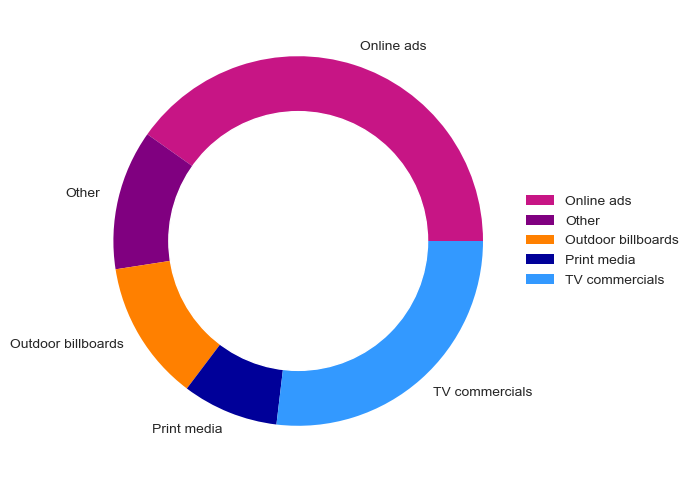

In [88]:
fig,ax = plt.subplots(figsize=(8,6))
respondent_marketing_circle = plt.Circle((0,0),radius=0.7, color='white')
ax.pie(data=respondent_count_by_marketing_channels, x='Percentage',labels='Marketing_channels',colors=('#C71585','#800080','#FF8000','#000099','#3399FF'))
respondent_marketing = plt.gcf()
respondent_marketing.gca().add_artist(respondent_marketing_circle)
fig.legend(loc='center right');

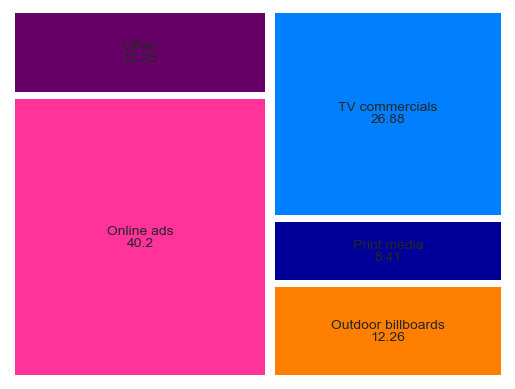

In [89]:
respondent_count_by_marketing_channels_value = []
respondent_count_by_marketing_channels_percent = []
for i in respondent_count_by_marketing_channels['Marketing_channels']:
    respondent_count_by_marketing_channels_value = respondent_count_by_marketing_channels_value + [i]
    
for k in respondent_count_by_marketing_channels['Percentage']:
    respondent_count_by_marketing_channels_percent = respondent_count_by_marketing_channels_percent + [k]
squarify.plot(sizes=[40.20,12.25,12.26,8.41,26.88], value=respondent_count_by_marketing_channels_percent, label=respondent_count_by_marketing_channels_value, color=['#FF3399','#660066','#FF8000','#000099','#0080FF'], pad=1)
plt.axis('off');

## Brand Penetration


#### 1. What do people think about our brand?

In [90]:
survey_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Response_ID                     10000 non-null  int64   
 1   Respondent_ID                   10000 non-null  int64   
 2   Consume_frequency               10000 non-null  category
 3   Consume_time                    10000 non-null  object  
 4   Consume_reason                  10000 non-null  object  
 5   Heard_before                    10000 non-null  object  
 6   Brand_perception                10000 non-null  object  
 7   General_perception              10000 non-null  object  
 8   Tried_before                    10000 non-null  object  
 9   Taste_experience                10000 non-null  int64   
 10  Reasons_preventing_trying       10000 non-null  object  
 11  Current_brands                  10000 non-null  object  
 12  Reasons_for_choosin

In [91]:
taste_experience_value = []
for i in survey_response_df['Taste_experience']:
    taste_experience_value = taste_experience_value + [i]

In [92]:
respondent_count_by_CodeX_taste_experience = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Taste_experience':taste_experience_value, 'Current_brands':current_brands_values})

In [93]:
respondent_count_by_CodeX_taste_experience_df = respondent_count_by_CodeX_taste_experience[respondent_count_by_CodeX_taste_experience['Current_brands']=='CodeX']

In [94]:
respondent_count_by_CodeX_taste_experience_df = pd.pivot_table(data=respondent_count_by_CodeX_taste_experience_df,index='Taste_experience', values='Respondent_ID', aggfunc='count').reset_index()

In [95]:
respondent_count_by_CodeX_taste_experience_df

,Taste_experience,Respondent_ID
0,1,107
1,2,148
2,3,286
3,4,248
4,5,191


In [96]:
taste_experience_percent = []
for i in respondent_count_by_CodeX_taste_experience_df['Respondent_ID']:
    i = round(i*100/980,2)
    taste_experience_percent = taste_experience_percent + [i]

In [97]:
respondent_count_by_CodeX_taste_experience_df['Percentage'] = pd.DataFrame({'Percentage':taste_experience_percent})

In [98]:
respondent_count_by_CodeX_taste_experience_df

,Taste_experience,Respondent_ID,Percentage
0,1,107,10.92
1,2,148,15.10
2,3,286,29.18
3,4,248,25.31
4,5,191,19.49


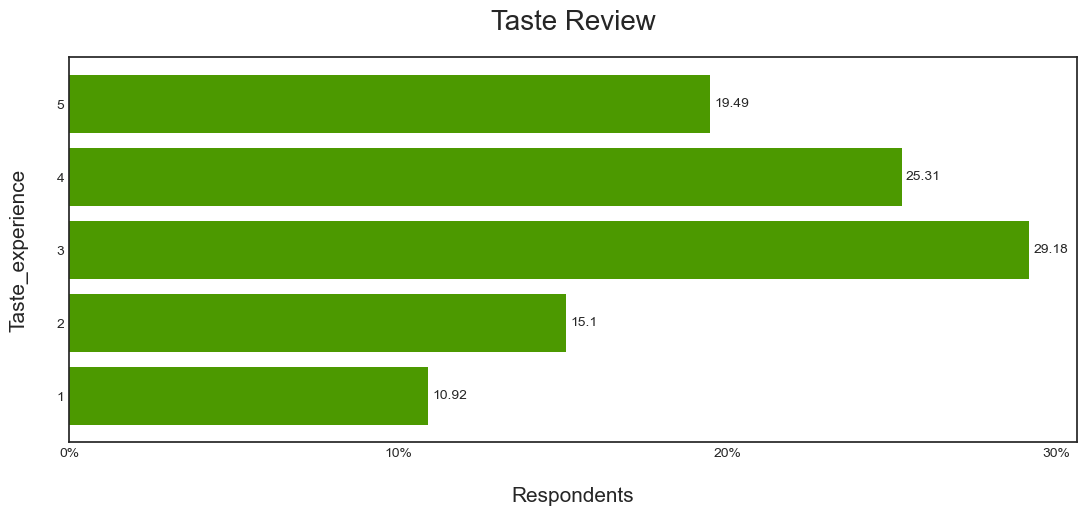

In [99]:
fig,ax = plt.subplots(figsize=(13,5))
respondent_taste_experience_barh = ax.barh(data=respondent_count_by_CodeX_taste_experience_df, y='Taste_experience', width='Percentage', label='Percentage', color='#4C9900')
for i in ax.containers:
    ax.bar_label(i,padding=3)
    
ax.set_xlabel('Respondents', fontsize=15, labelpad=20)
ax.set_ylabel('Taste_experience', fontsize=15, labelpad=20)
ax.set_title('Taste Review', fontsize=20, pad=20)
ax.set_xticks(np.arange(0,35,10))
ax.set_xticklabels(('0%','10%','20%','30%'));

In [100]:
reasons_preventing_trying_value = []
for i in survey_response_df['Reasons_preventing_trying']:
    reasons_preventing_trying_value = reasons_preventing_trying_value + [i]

In [101]:
respondent_count_by_CodeX_reasons_preventing_trying_df = pd.DataFrame({'Respondent_ID':respondent_id_values,'Reasons_preventing_trying':reasons_preventing_trying_value, 'Current_brands':current_brands_values})

In [102]:
respondent_count_by_CodeX_reasons_preventing_trying_df = respondent_count_by_CodeX_reasons_preventing_trying_df[respondent_count_by_CodeX_reasons_preventing_trying_df['Current_brands']!='CodeX']

In [103]:
respondent_count_by_CodeX_reasons_preventing_trying_df = pd.pivot_table(data=respondent_count_by_CodeX_reasons_preventing_trying_df, index='Reasons_preventing_trying', values='Respondent_ID',aggfunc='count').reset_index()

In [104]:
respondent_count_by_CodeX_reasons_preventing_trying_df

,Reasons_preventing_trying,Respondent_ID
0,Health concerns,2025
1,Not available locally,2202
2,Not interested in energy drinks,1983
3,Other,1150
4,Unfamiliar with the brand,1660


Text(0.5, 0, 'Reason')

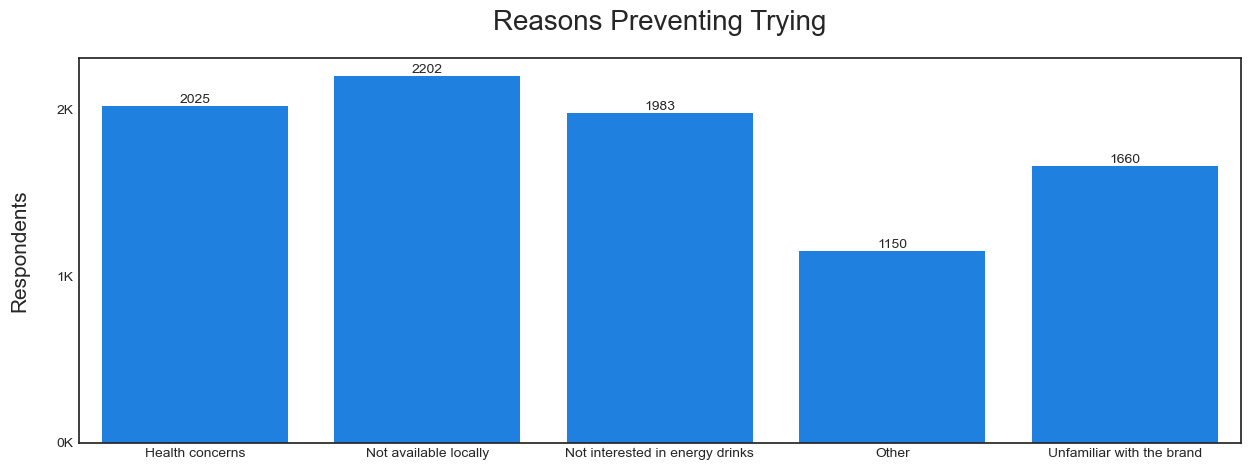

In [105]:
fig,ax = plt.subplots(figsize=(15,5))
respondent_by_CodeX_reasons_preventing_trying_bar = sns.barplot(data=respondent_count_by_CodeX_reasons_preventing_trying_df, y='Respondent_ID',x='Reasons_preventing_trying',color='#0080FF')

for i in ax.containers:
    ax.bar_label(i)
    
ax.set_yticks(np.arange(0,3000,1000))
ax.set_yticklabels(('0K','1K','2K'))
ax.set_title('Reasons Preventing Trying',fontsize=20, pad=20)
ax.set_ylabel('Respondents', fontsize=15, labelpad=20)
ax.set_xlabel('Reason', visible=False)

In [106]:
respondent_count_by_CodeX_reason_choosing_brands_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Reasons_for_choosing_brands':reasons_for_choosing_brands_values, 'Current_brands':current_brands_values})

In [107]:
respondent_count_by_CodeX_reason_choosing_brands_df = respondent_count_by_CodeX_reason_choosing_brands_df[respondent_count_by_CodeX_reason_choosing_brands_df['Current_brands']=='CodeX']

In [108]:
respondent_count_by_CodeX_reason_choosing_brands_df = pd.pivot_table(data=respondent_count_by_CodeX_reason_choosing_brands_df, index='Reasons_for_choosing_brands', values='Respondent_ID', aggfunc='count').reset_index()

In [109]:
respondent_count_by_CodeX_reason_choosing_brands_df

,Reasons_for_choosing_brands,Respondent_ID
0,Availability,195
1,Brand reputation,259
2,Effectiveness,176
3,Other,168
4,Taste/flavor preference,182


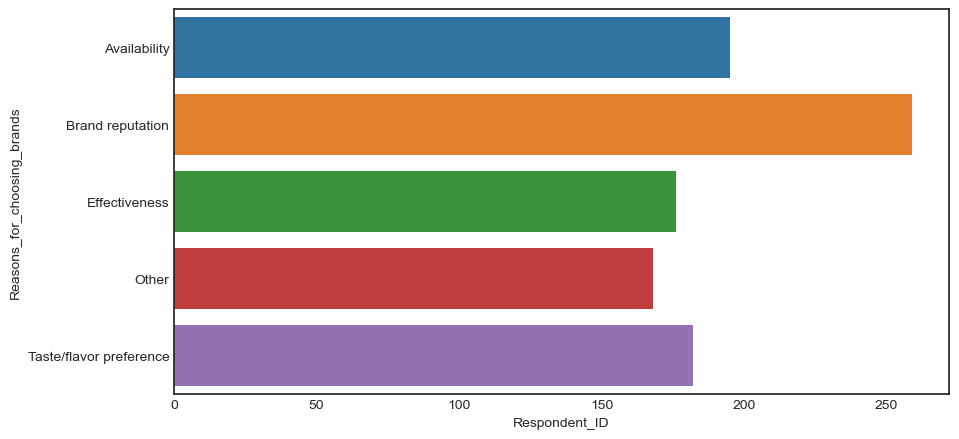

In [110]:
fig,ax = plt.subplots(figsize=(10,5))
respondent_by_CodeX_reason_choosing_brands_bar = sns.barplot(data=respondent_count_by_CodeX_reason_choosing_brands_df, x='Respondent_ID', y='Reasons_for_choosing_brands')

#### 2.Which cities do we need to focus more on?

In [111]:
survey_response_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [112]:
cities_df

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [113]:
current_brands_other_CodeX_values = []
respondent_city_id_values = []

for i in respondents_count_by_marketing_channels_brands_df['Current_brands']:
    current_brands_other_CodeX_values = current_brands_other_CodeX_values + [i]
    
for k in respondents_df['City_ID']:
    respondent_city_id_values = respondent_city_id_values + [k]
    

In [114]:
respondent_count_by_current_brands_cities_df = pd.DataFrame({'Respondent_ID':respondent_id_values,'City_ID':respondent_city_id_values})

In [115]:
respondent_count_by_current_brands_cities_df

,Respondent_ID,City_ID
0,120031,CT117
1,120032,CT118
2,120033,CT116
3,120034,CT113
4,120035,CT120
...,...,...
9995,130026,CT112
9996,130027,CT113
9997,130028,CT114
9998,130029,CT113


In [116]:
respondent_cities_values = []

for i in respondent_count_by_current_brands_cities_df['City_ID']:
    for k in cities_df[cities_df['City_ID']==i]['City']:
        respondent_cities_values = respondent_cities_values + [k]

In [117]:
respondent_count_by_current_brands_cities_df['City'] = pd.DataFrame({'City':respondent_cities_values})

In [118]:
respondent_count_by_current_brands_cities_df

,Respondent_ID,City_ID,City
0,120031,CT117,Ahmedabad
1,120032,CT118,Pune
2,120033,CT116,Hyderabad
3,120034,CT113,Bangalore
4,120035,CT120,Lucknow
...,...,...,...
9995,130026,CT112,Mumbai
9996,130027,CT113,Bangalore
9997,130028,CT114,Chennai
9998,130029,CT113,Bangalore


In [119]:
respondent_count_by_current_brands_cities_df['Current_brands'] = pd.DataFrame({'Current_brands':current_brands_other_CodeX_values})

In [120]:
respondent_count_by_current_brands_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Respondent_ID   10000 non-null  int64 
 1   City_ID         10000 non-null  object
 2   City            10000 non-null  object
 3   Current_brands  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [121]:
respondent_count_by_current_brands_cities_df = pd.pivot_table(respondent_count_by_current_brands_cities_df, index='City', columns='Current_brands',values='Respondent_ID',aggfunc='count')

In [122]:
respondent_count_by_current_brands_cities_df

Current_brands,CodeX,Other
City,,
Ahmedabad,45,411
Bangalore,292,2536
Chennai,92,845
Delhi,40,389
Hyderabad,182,1651
Jaipur,28,332
Kolkata,48,518
Lucknow,5,170
Mumbai,156,1354


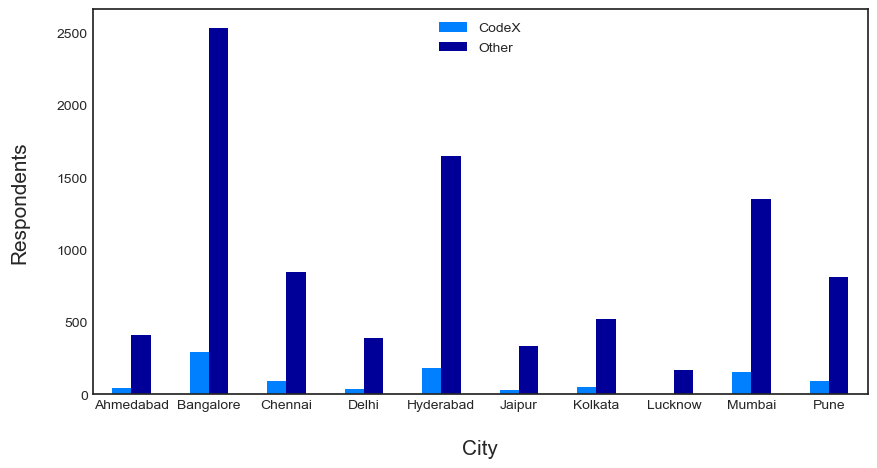

In [123]:
respondent_count_by_current_brands_cities_df.plot(kind='bar', figsize=(10,5), rot=0, color=('#0080FF','#000099'))
plt.xlabel('City',fontsize=15,labelpad=20)
plt.ylabel('Respondents', fontsize=15,labelpad=20);
plt.legend(loc='upper center')

## Purchase Behavior

#### 1. Where do respondents prefer to purchase energy drinks?

In [124]:
survey_response_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [125]:
purchase_location_values = []
for i in survey_response_df['Purchase_location']:
    purchase_location_values = purchase_location_values + [i]
    

In [126]:
respondent_count_by_purchase_location_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Purchase_location':purchase_location_values})

In [127]:
respondent_count_by_purchase_location_df

,Respondent_ID,Purchase_location
0,120031,Supermarkets
1,120032,Supermarkets
2,120033,Supermarkets
3,120034,Supermarkets
4,120035,Online retailers
...,...,...
9995,130026,Supermarkets
9996,130027,Online retailers
9997,130028,Other
9998,130029,Supermarkets


In [128]:
respondent_count_by_purchase_location_df = pd.pivot_table(data=respondent_count_by_purchase_location_df, index='Purchase_location', values='Respondent_ID', aggfunc='count')

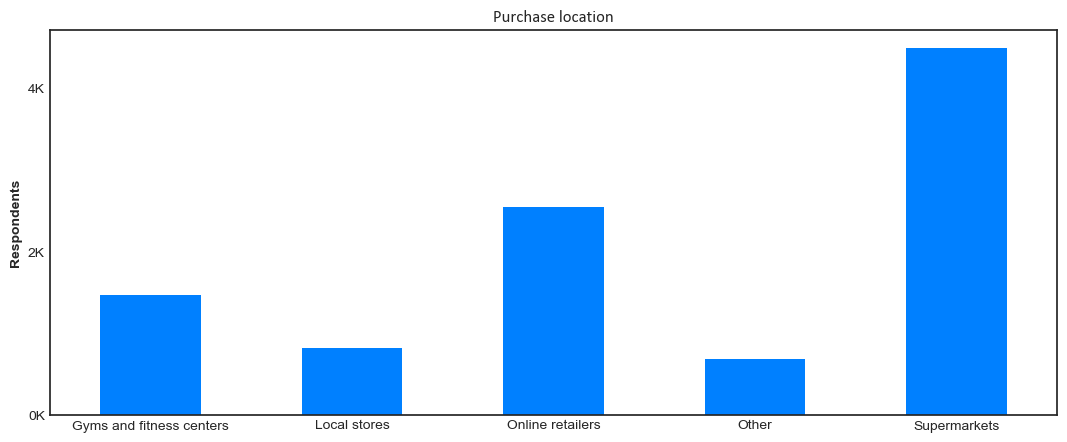

In [129]:
respondent_count_by_purchase_location_df.plot(kind='bar', rot=0, figsize=(13,5), color='#0080FF', legend=False)
plt.xlabel('False',visible=False)
plt.ylabel('Respondents', fontsize=10, fontweight='bold')
plt.yticks(ticks=np.arange(0,5000,2000),labels=('0K','2K','4K'))
plt.title('Purchase location', fontdict={'fontsize':12, 'family':'calibri'});

#### 2. What are the capital consumption situations for energy drinks among respondents?

In [130]:
survey_response_df

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


In [131]:
typical_consumption_situations_values = []
for i in survey_response_df['Typical_consumption_situations']:
    typical_consumption_situations_values = typical_consumption_situations_values + [i]

In [132]:
respondent_count_by_typical_consumption_situations_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Typical_consumption_situations':typical_consumption_situations_values})

In [133]:
respondent_count_by_typical_consumption_situations_df

,Respondent_ID,Typical_consumption_situations
0,120031,Studying/working late
1,120032,Sports/exercise
2,120033,Studying/working late
3,120034,Sports/exercise
4,120035,Studying/working late
...,...,...
9995,130026,Studying/working late
9996,130027,Social outings/parties
9997,130028,Sports/exercise
9998,130029,Studying/working late


In [134]:
respondent_count_by_typical_consumption_situations_df=pd.pivot_table(data=respondent_count_by_typical_consumption_situations_df,index='Typical_consumption_situations', values='Respondent_ID',aggfunc='count', sort=True)

In [135]:
respondent_count_by_typical_consumption_situations_df = respondent_count_by_typical_consumption_situations_df.reindex(respondent_count_by_typical_consumption_situations_df['Respondent_ID'].sort_values(ascending=True).index)

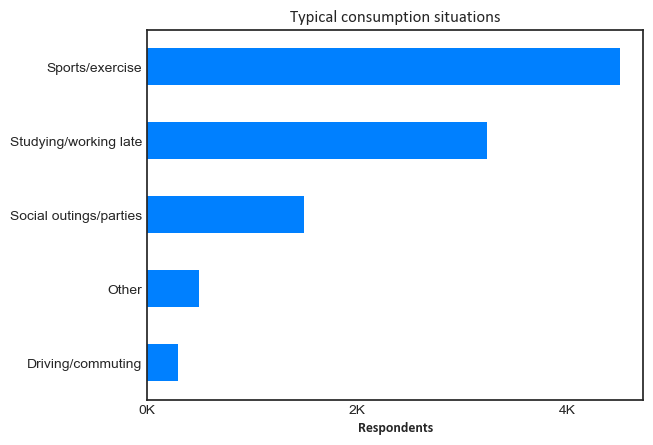

In [136]:
respondent_count_by_typical_consumption_situations_df.plot(kind='barh', legend=False, color='#0080FF')
plt.ylabel('False',visible=False)
plt.xticks(np.arange(0,6000,2000),('0K','2K','4K'))
plt.xlabel('Respondents', fontdict={'fontsize':10,'family':'calibri', 'fontweight':'bold'})
plt.title('Typical consumption situations', fontdict={'fontsize':12, 'family':'calibri'});

#### 3. What factors influence respondents' purchase decision, such as price range and limited edition packaging?

In [137]:
survey_response_df['Price_range'] = survey_response_df['Price_range'].astype('category')

In [138]:
survey_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Response_ID                     10000 non-null  int64   
 1   Respondent_ID                   10000 non-null  int64   
 2   Consume_frequency               10000 non-null  category
 3   Consume_time                    10000 non-null  object  
 4   Consume_reason                  10000 non-null  object  
 5   Heard_before                    10000 non-null  object  
 6   Brand_perception                10000 non-null  object  
 7   General_perception              10000 non-null  object  
 8   Tried_before                    10000 non-null  object  
 9   Taste_experience                10000 non-null  int64   
 10  Reasons_preventing_trying       10000 non-null  object  
 11  Current_brands                  10000 non-null  object  
 12  Reasons_for_choosin

In [139]:
price_range_values = []
for i in survey_response_df['Price_range']:
    price_range_values = price_range_values + [i]
    
limited_edition_packaging_values = []
for k in survey_response_df['Limited_edition_packaging']:
    limited_edition_packaging_values = limited_edition_packaging_values + [k]

In [140]:
respondent_count_by_price_range_limited_edition_packaging_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Price_range':price_range_values, 'Limited_edition_packaging':limited_edition_packaging_values})

In [141]:
respondent_count_by_price_range_limited_edition_packaging_df

,Respondent_ID,Price_range,Limited_edition_packaging
0,120031,50-99,Yes
1,120032,50-99,No
2,120033,100-150,Not Sure
3,120034,Above 150,No
4,120035,100-150,Yes
...,...,...,...
9995,130026,100-150,Yes
9996,130027,50-99,Yes
9997,130028,100-150,No
9998,130029,50-99,Not Sure


In [142]:
respondent_count_by_price_range_limited_edition_packaging_df = pd.pivot_table(data=respondent_count_by_price_range_limited_edition_packaging_df, columns='Limited_edition_packaging', index= 'Price_range', values='Respondent_ID', aggfunc='count')

In [143]:
respondent_count_by_price_range_limited_edition_packaging_df = respondent_count_by_price_range_limited_edition_packaging_df.reindex(['Below 50','50-99','100-150','Above 150'])

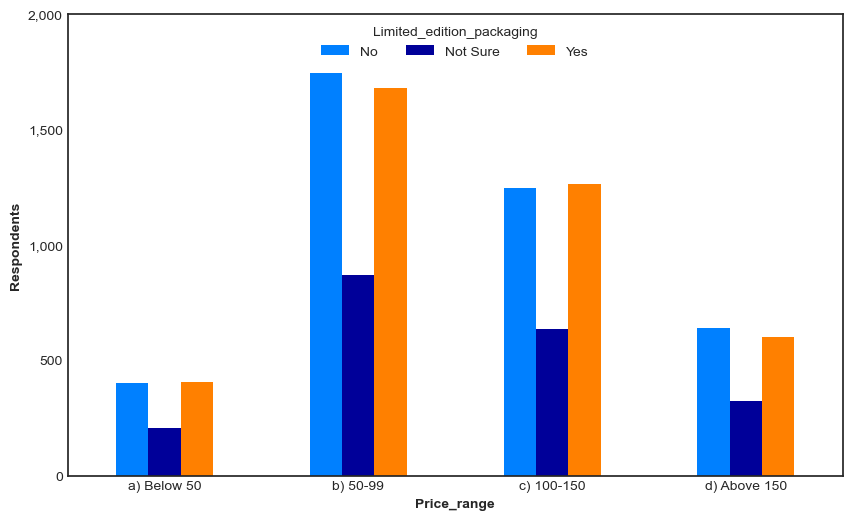

In [144]:
respondent_count_by_price_range_limited_edition_packaging_df.plot(kind='bar', rot=0, figsize=(10,6), color=('#0080FF', '#000099','#FF8000'))
plt.xlabel('Price_range',fontdict={'fontweight':'bold'})
respondent_count_by_price_range_limited_edition_packaging_index = []
plt.xticks(range(0,len(respondent_count_by_price_range_limited_edition_packaging_df.index)),labels=['a) Below 50', 'b) 50-99', 'c) 100-150', 'd) Above 150'])
plt.ylabel('Respondents',fontdict={'fontweight':'bold'})
plt.yticks(np.arange(0,2500,500),labels=['0','500','1,000','1,500','2,000'])
plt.legend(title='Limited_edition_packaging',ncol=4, loc='upper center');

## Product Development

#### 1. Which area of business should we focus more on our product development?

In [145]:
respondent_count_by_CodeX_taste_experience_df = respondent_count_by_CodeX_taste_experience_df.set_index('Taste_experience')

In [146]:
respondent_count_by_CodeX_taste_experience_df = respondent_count_by_CodeX_taste_experience_df.sort_index(ascending=False)

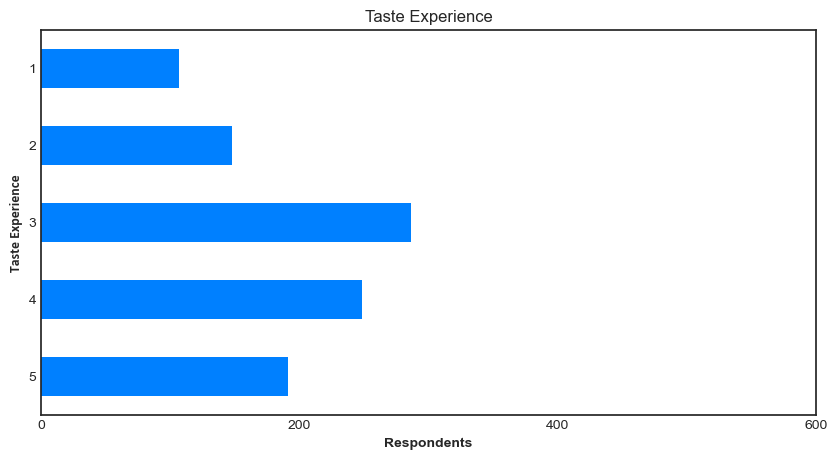

In [147]:
respondent_count_by_CodeX_taste_experience_df.plot(kind='barh', y='Respondent_ID', legend=False, figsize=(10,5), color='#0080FF')
plt.xlabel('Respondents', fontdict={'fontweight':'bold'})
plt.xticks(np.arange(0,700,200), labels=['0','200','400','600'])
plt.ylabel('Taste Experience', fontdict={'fontweight':'bold', 'family':'Calibri'})
plt.title('Taste Experience');

In [148]:
respondent_count_by_marketing_channels_current_brands_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Marketing_channels':marketing_channels_values, 'Current_brands':current_brands_values})

In [149]:
respondent_count_by_marketing_channels_current_brands_df

,Respondent_ID,Marketing_channels,Current_brands
0,120031,TV commercials,Blue Bull
1,120032,Print media,Bepsi
2,120033,Online ads,Bepsi
3,120034,Online ads,Bepsi
4,120035,Online ads,Sky 9
...,...,...,...
9995,130026,Print media,Cola-Coka
9996,130027,TV commercials,Gangster
9997,130028,Outdoor billboards,Blue Bull
9998,130029,Online ads,Blue Bull


In [150]:
for i in respondent_count_by_marketing_channels_current_brands_df['Current_brands']:
    if i != 'CodeX':
        respondent_count_by_marketing_channels_current_brands_df['Current_brands'] = respondent_count_by_marketing_channels_current_brands_df['Current_brands'].replace([i],'Other')
        

In [151]:
respondent_count_by_marketing_channels_current_brands_df = pd.pivot_table(data=respondent_count_by_marketing_channels_current_brands_df, index='Marketing_channels', values='Respondent_ID', columns='Current_brands',aggfunc='count')

In [152]:
respondent_count_by_marketing_channels_current_brands_df = respondent_count_by_marketing_channels_current_brands_df.reindex(respondent_count_by_marketing_channels_current_brands_df['CodeX'].sort_values().index)

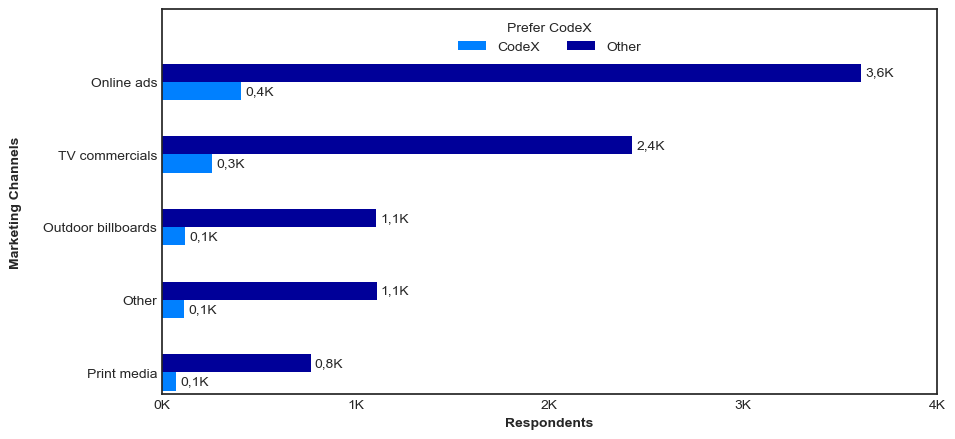

In [153]:
bar = respondent_count_by_marketing_channels_current_brands_df.plot(kind='barh', figsize=(10,5), color=('#0080FF','#000099'))
plt.bar_label(bar.containers[1], padding=3, labels=['0,8K','1,1K','1,1K','2,4K','3,6K'])
plt.bar_label(bar.containers[0], padding=3, labels=['0,1K','0,1K','0,1K','0,3K','0,4K'])
plt.ylabel('Marketing Channels', fontdict={'fontweight':'bold'},labelpad=15)
plt.ylim(-0.3,5)
plt.xticks(np.arange(0,4500,1000), labels=['0K','1K','2K','3K','4K'])
plt.xlabel('Respondents', fontdict={'fontweight':'bold'})
plt.legend(title='Prefer CodeX',loc='upper center', ncol=3)

In [154]:
respondent_count_by_current_brand_df

,Current_brands,Respondent_ID,Percentage
0,Bepsi,2112,21.12
1,Blue Bull,1058,10.58
2,CodeX,980,9.80
3,Cola-Coka,2538,25.38
4,Gangster,1854,18.54
5,Others,479,4.79
6,Sky 9,979,9.79


Text(0.5, 1.0, 'Current brands')

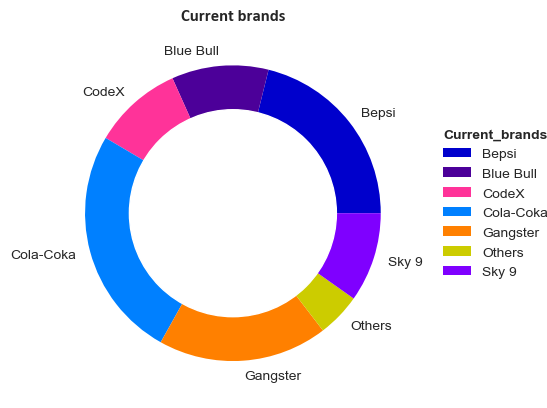

In [177]:
fig,ax = plt.subplots()
current_brands_circle_chart=plt.Circle((0,0),radius=0.7,color='white')
ax.pie(data=respondent_count_by_current_brand_df, x='Percentage',labels='Current_brands', colors=('#0000CC','#4C0099','#FF3399','#0080FF','#FF8000', '#CCCC00','#7F00FF'))
plt.gcf().gca().add_artist(current_brands_circle_chart)
title_font = font_manager.FontProperties(weight='bold')
fig.legend(title='Current_brands',loc='center right',borderpad=-0.5, title_fontproperties=title_font, alignment='left')
plt.title('Current brands', fontdict={'family':'Calibri','fontweight':'bold'})

In [207]:
respondent_count_by_reasons_preventing_trying_df = pd.DataFrame({'Respondent_ID':respondent_id_values, 'Current_brands':current_brands_values, 'Reasons_preventing_trying':reasons_preventing_trying_value})

In [208]:
respondent_count_by_reasons_preventing_trying_df

,Respondent_ID,Current_brands,Reasons_preventing_trying
0,120031,Blue Bull,Unfamiliar with the brand
1,120032,Bepsi,Not interested in energy drinks
2,120033,Bepsi,Not available locally
3,120034,Bepsi,Other
4,120035,Sky 9,Other
...,...,...,...
9995,130026,Cola-Coka,Health concerns
9996,130027,Gangster,Not available locally
9997,130028,Blue Bull,Other
9998,130029,Blue Bull,Unfamiliar with the brand


In [209]:
for i in respondent_count_by_reasons_preventing_trying_df['Current_brands']:
    if i != 'CodeX':
        respondent_count_by_reasons_preventing_trying_df['Current_brands'] = respondent_count_by_reasons_preventing_trying_df['Current_brands'].replace([i],'Other')

for k in respondent_count_by_reasons_preventing_trying_df['Reasons_preventing_trying']:
    if (k!='Not available locally') & (k!='Unfamiliar with the brand'):
        respondent_count_by_reasons_preventing_trying_df['Reasons_preventing_trying'] = respondent_count_by_reasons_preventing_trying_df['Reasons_preventing_trying'].replace([k],'Other')


In [210]:
respondent_count_by_reasons_preventing_trying_df = respondent_count_by_reasons_preventing_trying_df[respondent_count_by_reasons_preventing_trying_df['Current_brands']=='CodeX']

In [212]:
respondent_count_by_reasons_preventing_trying_df = pd.pivot_table(data=respondent_count_by_reasons_preventing_trying_df, index='Reasons_preventing_trying', values='Respondent_ID', aggfunc='count')

In [217]:
respondent_count_by_reasons_preventing_trying_df = respondent_count_by_reasons_preventing_trying_df.reindex(respondent_count_by_reasons_preventing_trying_df['Respondent_ID'].sort_values().index)

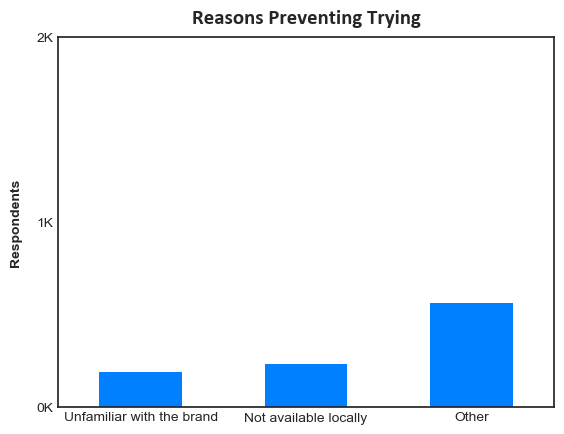

In [232]:
respondent_count_by_reasons_preventing_trying_df.plot(kind='bar', rot=0, color='#0080FF', legend=False)
plt.xlabel('abc',visible=False)
plt.ylabel('Respondents',fontdict={'fontweight':'bold'},labelpad=10)
plt.yticks(np.arange(0,2500,1000), labels=['0K','1K','2K'])
plt.title('Reasons Preventing Trying', fontdict={'family':'Calibri','fontweight':'bold','fontsize':15},pad=10);